# Lista 10

### Zaimplementowane biblioteki

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### Zadanie 1

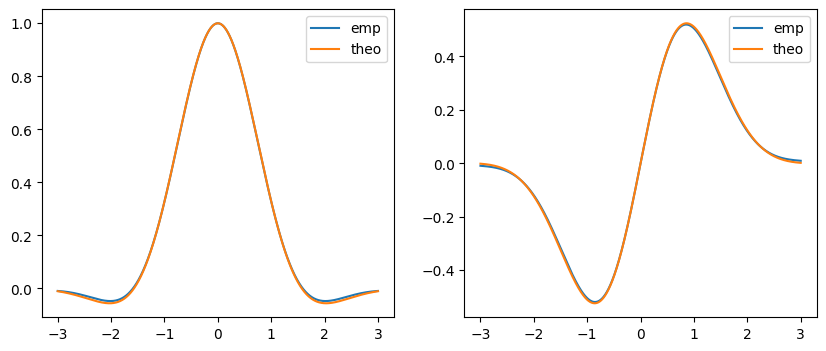

In [2]:
def characteristic(theta, x):
    values = np.sum(np.exp(1j*theta*x))
    return values/x.size

N=10000
t = np.linspace(-3,3,N)
data = np.random.normal(loc=1, size=N)
empirical = [characteristic(t_val, data) for t_val in t]
theoretical = np.exp(1j*t- 0.5*t**2) 

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(t, np.real(empirical), label='emp')
ax[0].plot(t, np.real(theoretical), label='theo')
ax[0].legend()
ax[1].plot(t, np.imag(empirical), label='emp')
ax[1].plot(t, np.imag(theoretical), label='theo')
ax[1].legend()
plt.show()

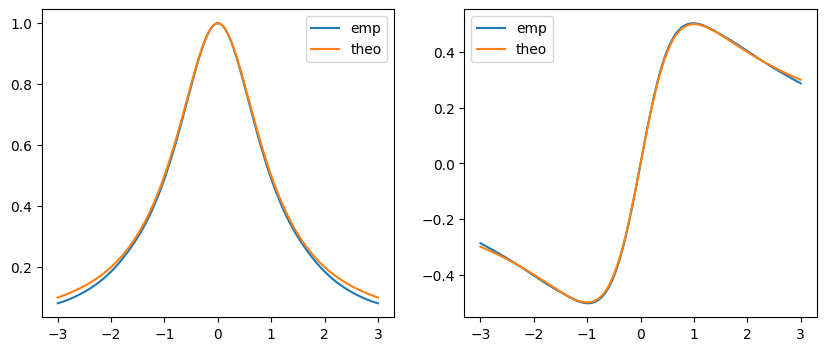

In [3]:
N=10000
t = np.linspace(-3,3,N)
data = np.random.exponential(scale=1, size=N)
empirical = [characteristic(t_val, data) for t_val in t]
theoretical = 1/(1-1j*t)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(t, np.real(empirical), label='emp')
ax[0].plot(t, np.real(theoretical), label='theo')
ax[0].legend()
ax[1].plot(t, np.imag(empirical), label='emp')
ax[1].plot(t, np.imag(theoretical), label='theo')
ax[1].legend()
plt.show()

### Zadanie 2

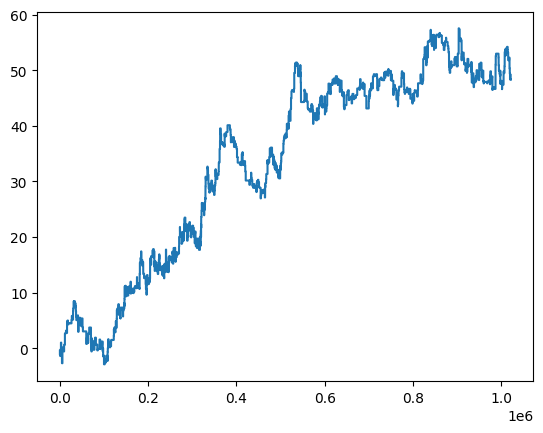

In [4]:
lam = 1000
ns = np.random.poisson(1000)

t = np.random.exponential(scale=lam, size = ns)
times = np.cumsum(t)

y = np.random.normal(size = ns)
ys = np.cumsum(y)

plt.step(times, ys)
plt.show()

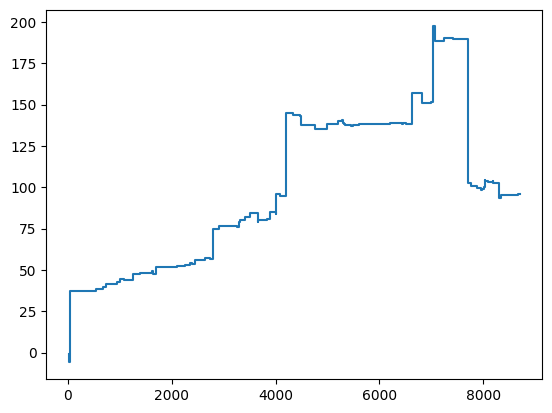

In [5]:
lam = 100
ns = np.random.poisson(100)

t = np.random.exponential(scale=lam, size = ns)
times = np.cumsum(t)

y = np.random.standard_cauchy(size = ns)
ys = np.cumsum(y)

plt.step(times, ys)
plt.show()

### Zadanie 3

0.14044889029331803 1
0.12093306566089967 20
0.6691358352828434 24
1.0500156364328976 30
0.318520085410769 42
1.105639161061712 50
0.03324345821516673 75
1.3517210238852737 90
0.2347206162234079 94
2.1446062339049905 95


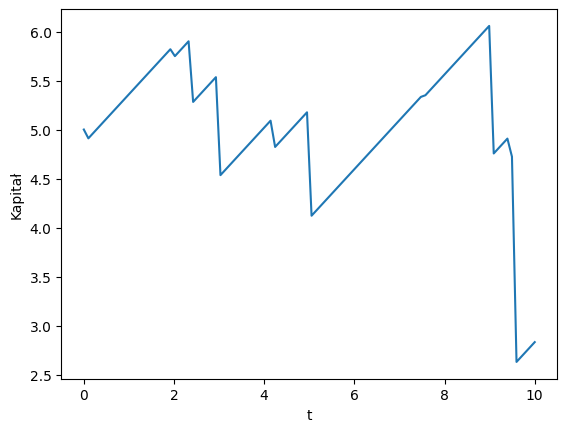

Ryzyko niewypłacalności w czasie 1: 0.024
Ryzyko niewypłacalności w czasie 3: 0.137
Ryzyko niewypłacalności w czasie 5: 0.309


In [6]:
u = 5 
c0 = 0.5
lam = 1 

def process(T=10):
    results = np.array([0])
    lam = 1
    t = 0
    while t <= T:
        u = np.random.uniform(0,1)
        t = t - np.log(u)/lam
        results = np.append(results, t)
    return results

intervals = process()
ts = np.linspace(0, 10, 100)
xs = np.random.exponential(scale = 1, size= len(intervals))

indices = []
condition = [[t<t0 for t0 in ts] for t in intervals]
for el in condition:
    try:
        indices.append(el.index(True))
    except:
        break

incomes = c0*ts
damages = list(zip(xs, indices))
for val, idx in damages:
    print(val, idx)
    incomes[idx:] -= val
steps = u + incomes


plt.plot(ts, steps)
plt.xlabel('t')
plt.ylabel('Kapitał')
plt.show()

bankrupcy_risk = []
for t in [1,3,5]:
    result = 0
    for i in range(1000):
        intervals = process(t)
        ts = np.arange(0, t, 0.1)
        xs = np.random.uniform(np.random.exponential(scale = 1, size= len(intervals)))
        indices = []
        condition = [[t<t0 for t0 in ts] for t in intervals]
        for el in condition:
            try:
                indices.append(el.index(True))
            except:
                break

        incomes = c0*ts
        damages = list(zip(xs, indices))
        for val, idx in damages:
            incomes[idx:] -= val
        steps = u + incomes
        if np.any(steps < 0):
            result += 1
    bankrupcy_risk.append(result/1000)
print(f'Ryzyko niewypłacalności w czasie 1: {bankrupcy_risk[0]}\nRyzyko niewypłacalności w czasie 3: {bankrupcy_risk[1]}\nRyzyko niewypłacalności w czasie 5: {bankrupcy_risk[2]}')
    